# Compte rendu du defi IA toulouse 2020.

Etudiants 1 : OUATTARA zie            

Etudiant 2 : COULIBALY Gninwoyo Eric Hermann   

GROUPE: SOMMET DE L'HIMALAYA

CLASSEMENT FINAL          : 21 ieme

Préambule
l' INSA de Toulouse  proposera en 2020 un nouveau défi en collaboration avec Airbus. Comme les années précédentes (2018, 2019), ce défi est construit sur le principe d'un concours Kaggle.
Le thème de cette année sera la détection d'anomalie. Les capteurs des différentes plateformes AIRBUS (aviation, hélicoptères, satellites) génèrent une très grande quantité de données. Les occurrences de données aberrantes sont rares. Cependant il n'est pas concevable d'attendre plus d'occurrences d'erreurs avant de les étudier. Le challenge est de pouvoir créer des méthodes permettant de détecter des changements anormaux uniquement à partir de données normales (non-supervisées).

In [0]:
# importation des bibliothèques necessaires 

import numpy as
import matplotlib.pyplot as plt
import h5py
import math

In [0]:
# Chargement des données depuis mon compte drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/test.hdf5"
path1= "/content/drive/My Drive/train.hdf5"

Les deux cellules suivantes sont un petit test de visualisation de quelques séquences d'entrainemant pour voir un peu le comportement des sequences normales. En fait c'est comme notre étape de pré-traitement.

dftrain
<class 'h5py._hl.group.Group'>
<HDF5 group "/dftrain" (4 members)>
['axis0', 'axis1', 'block0_items', 'block0_values']


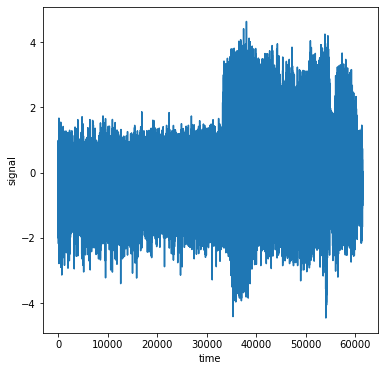

In [0]:
train = h5py.File(path1, 'r')
#valid = h5py.File(pathVal, 'r')

list_elmts = [key for key in train['/'].keys()]

for key in list_elmts:
    print(key)
    print(type(train['/'][key]))
    print(train['/'][key])
    print([key for key in train['/'][key].keys()])


group = train['/dftrain']
mon_dataset = group['block0_values']
axis0 = group['axis0'] 
block0_items = group['block0_items']

plt.figure(0,figsize = (6,6))
plt.plot(mon_dataset[1555,:], '-')
plt.xlabel("time")
plt.ylabel("signal")
#print(mon_dataset[133])
#plt.scatter(mon_dataset[:, 0], mon_dataset[:, 1],zorder=10, cmap=plt.cm.Paired,
 #               edgecolor='k', s=20)
train.flush()
#train.close()

dffinal
<class 'h5py._hl.group.Group'>
<HDF5 group "/dffinal" (4 members)>
['axis0', 'axis1', 'block0_items', 'block0_values']


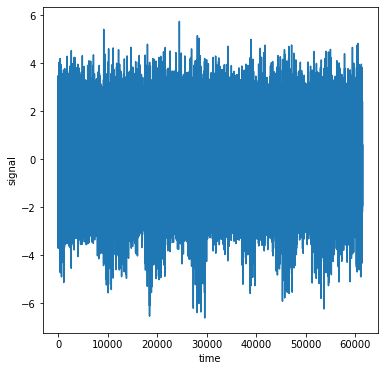

In [0]:
#train = h5py.File(pathTrain, 'r')
Test = h5py.File(path, 'r')

list_elmts = [key for key in Test['/'].keys()]

for key in list_elmts:
    print(key)
    print(type(Test['/'][key]))
    print(Test['/'][key])
    print([key for key in Test['/'][key].keys()])


group2 = Test['/dffinal']
mon_dataset2 = group2['block0_values']
axis0 = group2['axis0'] 
#block0_items = group['block0_items']

plt.figure(0,figsize = (6,6))
plt.plot(mon_dataset2[1192,:], '-')
plt.xlabel("time")
plt.ylabel("signal")
#print(mon_dataset[133])
#plt.scatter(mon_dataset[:, 0], mon_dataset[:, 1],zorder=10, cmap=plt.cm.Paired,
 #               edgecolor='k', s=20)
Test.flush()
#train.close()

In [0]:
#On verifie la tailles de notre train pour etre sure que les données chargées sont bien chargé car on etais confronté 
# à un probleme lors du chargement des données du train qui nous donnais des resultat pas bon
mon_dataset2.shape

(1917, 61440)

Ci dessous sont énoncées les différentes méthodes utilisées

METHODE 1

Après avoir observé graphiquement quelques sécances normales du data train, nous avons remarqué que celles ci avaient tendance à  être symétriques par rapport à une certaine valeur (très souvent 0). Il nous faut donc trouver un critère qui serait assez fort pour caractéser les données normales. L'idée est donc d'additionner le maximum et le minimum des variables de chaque données normales, puis d'utiliser le minimum et le maximum de toutes ces sommes pour détecter les données annormales du data validation comme expliqué dans les algorithmes suivants.

In [0]:
M=int(mon_dataset.shape[0])             #J'extraie chaque valeur max et min de chaque donnée d'entrainemant que je range dans
#Valmax=np.zeros((1,M))                 des listes Valmax et Valmin
Valmax=[]
Valmin=[]
for i in range(M):
    Valmax.append(max(mon_dataset[i,:]))
    Valmin.append(min(mon_dataset[i,:]))
    

In [0]:
A=np.array((Valmax)) # J'additionne le max et min de chaque donnée normale et je range le résultat dans la liste T
B=np.array((Valmin))
V=np.zeros((M))
V=A+B
T=[]
for i in range(M):
    T.append(V[i])

In [0]:
N=int(mon_dataset2.shape[0])             #J'extraie chaque valeur max et min de chaque donnée de validation que je range dans
#Valmax=np.zeros((1,M))                   des listes Valmax2 et Valmin2
Valmax2=[]
Valmin2=[]
for i in range(N):
    Valmax2.append(max(mon_dataset2[i,:]))
    Valmin2.append(min(mon_dataset2[i,:]))

In [0]:
C=np.array((Valmax2)) # J'additionne le max et min de chaque donnée de validation et je range le résultat dans la liste U
D=np.array((Valmin2))
W=np.zeros((N))
W=C+D
U=[]
for i in range(N):
    U.append(W[i])

In [0]:
# On décide donc qu'une donnée est anormale si son max+min < min(max+min) de nos données d'entraiment 
# ou si max+min > max(max+min) des données d'entrainement. Si c'est le cas alors on met "1" à sa position sinon "0"
Z1=[]
for i in range(N):
    if U[i]<min(T):
        Z1.append(1)
    elif U[i]>max(T):
        Z1.append(1)
    else:
        Z1.append(0)
#A la fin la liste Z1 contient des 1 pour les séquences anormales et des 0 sinon        

In [0]:
Z1.count(1) #  On compte le nombre de séquences anormales et on obtient 80

80

METHODE 2 

On calcule la moyenne des variables de chaque séquence des données de validation, que l'on compare au max et au min de l'ensemble des moyennes des données d'entrainement de la manière décrite dans les algorithmes qui suivent.

In [0]:
Mean=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        Mean[j,0]=np.mean(mon_dataset[j,:]) # calcul la moyenne de chaque séquences du train

In [0]:
Mean2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        Mean2[j,0]=np.mean(mon_dataset2[j,:]) # calcul la moyenne de chaque séquences de validation

In [0]:
# On décide donc qu'une donnée est anormale si son mean < min(mean) de nos données d'entraiment 
# ou si mean > max(mean) des données d'entrainement. Si c'est le cas alors on met "1" à sa position sinon "0"
Z2=[]
for i in range(N):
    if Mean2[i]<min(Mean):
        Z2.append(1)
    elif Mean2[i]>max(Mean):
        Z2.append(1)
    elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        Z2.append(1)
    else:
        Z2.append(0)

In [0]:
Z2.count(1) # avec la methode 2 on arrive à détecter 66 séquences anormales

66

METHODE 3 : 

Ici on décide qu'une séquence est anormale si son maximum est plus petit que le minimum des maximums des données d'entrainement ou si son minimum est plus grand que le maximum des minimums des données d'entrainement. Cela est basée au début sur l'intuition que des séquences n'ayant que des valeurs positives ou négatives sont anormales. 

In [0]:
Z3=[]
for i in range(N):
   
    if max(mon_dataset2[i,:])<min(Valmax) or min(mon_dataset2[i,:])>max(Valmin):
        Z3.append(1)
    else:
        Z3.append(0)

In [0]:
Z3.count(1) # avec ce critère on parvient à détecter 227 séquences

227

METHODE 4 

Basée sur le produit entre les elements du vecteur des max et ceux des min ensuite prendre leur max

In [0]:
G=np.array(Valmax)
H=np.array(Valmin)
I=G*H


In [0]:
N=int(mon_dataset2.shape[0])
G2=np.array(Valmax2)
H2=np.array(Valmin2)
I2=G2*H2


In [0]:
 
Z4=[]
for i in range(N):
    if I2[i]<min(I):
        Z4.append(1)
    elif I2[i]>max(I):
        Z4.append(1)
    else:
        Z4.append(0)

In [0]:
Z4.count(1) # avec la méthode on detecte 26 anormales

26

METHODE 5

Ecartype

In [0]:
STD=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        STD[j,0]=np.std(mon_dataset[j,:])

In [0]:
STD2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        STD2[j,0]=np.std(mon_dataset2[j,:])

In [0]:
Z5=[]
for i in range(N):
    if STD2[i]<min(STD):
        Z5.append(1)
    elif STD2[i]>max(STD):
        Z5.append(1)
    elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        Z5.append(1)
    else:
        Z5.append(0)

In [0]:
Z5.count(1) # avec le calcul des écart-types on trouve 108 anormales

108

METHODE 6 : 

Consiste à comparer les valeur max (resp min ) des séquences anormales aux valeurs max (resp min) des séquences normales. On prend comme anormale toute séquence de notre validation dont le max (resp min ) est supérieur (resp inférieur) au max (resp min) des valeurs max (resp. des valeurs min) du train.

In [0]:
Z =[]
for i in range(N):
    if max(mon_dataset2[i,:])>max(Valmax) :

        Z.append(1)
    elif min(mon_dataset2[i,:])< min(Valmin) :
        Z.append(1)
   
    else :
        Z.append(0)

In [0]:
Z.count(1) # on compte 56 anormales

56

Apres avoir effectué ces tests on va maintenant , croiser les différent résultats et réunir dans une même liste, toutes les séquences anormales détectées.

In [0]:
# compraison des séquences anormales detectées par la méthode 1 et la méthode 2
for i in range(N):
    if Z2[i]!=Z1[i]: # si au même indice on a pas le même nombre alors on a une anomalie ne figurant pas à la fois dans les deux listes 
        Z2[i]=1 # on rajoute donc cette anomalie dans l'une des listes.Si elle y existait déjà elle est juste écrasée et réajoutée

In [0]:
Z2.count(1) # la methode 2 nous donnait 66 tandis que la methode 1 donnait 80 
            # après croisement on a juste gagné une seule anomalie en plus

81

C'est le même raisonnement pour ce qui suit

In [0]:
for i in range(N):
    if Z3[i]!=Z2[i]:
        Z3[i]=1

In [0]:
Z3.count(1)

308

In [0]:
for i in range(N):
    if Z4[i]!=Z3[i]:
        Z4[i]=1

In [0]:
Z4.count(1)

308

In [0]:
for i in range(N):
    if Z5[i]!=Z3[i]:
        Z5[i]=1

In [0]:
Z5.count(1)

332

A la fin de tous les croisements on se retrouve avec au total 332 séquences anormales qui a constitué notre unique soumission pour la deuxième partie du défi. Nous avions continué à exploiter d'autres idées que vous pourrai regarder dans ce qui suit mais on a pas pu soumettre le résultat final car nous avons eu beaucoup de problèmes techniques et de connexion avec le jupyter en ligne de l'école. Ces méthodes étaient nouvelles, n'ont jamais étées soumises ni corrigées donc on ne sait pas si elles marchaient bien ou pas.

METHODE 6 Fourier : Basé sur sur les calcules des transformées direct et inverse de fourier. comparaison des module , argument...

In [0]:
 # charge des bibliothèque de fourier
 
import numpy as np
from numpy.fft import fft, ifft


In [0]:
# calcule des min et max des modules du train

MODmax=np.zeros((mon_dataset.shape[0],1))
MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        MODmax[j,0]=max(np.abs(fft(mon_dataset[j,:])))
        MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
 
# calcule des module de la validation

MODmax2=np.zeros((mon_dataset2.shape[0],1))
MODmin2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        MODmax2[j,0]=max(np.abs(fft(mon_dataset2[j,:])))
        MODmin2[j,0]=min(np.abs(fft(mon_dataset2[j,:])))

In [0]:
# comparaison des modules

Z6=[]
for i in range(N):
    if MODmin2[i]<min(MODmin):
        Z6.append(1)
    elif MODmax2[i]>max(MODmax):
        Z6.append(1)
  
    else:
        Z6.append(0)

In [0]:
Z6.count(1) # on detecte 56 sequences anormales

56

In [0]:
# croisement avec les 332 qu'on avait trouvé

for i in range(N):
    if Z6[i]!=Z[i]:
        Z6[i]=1

In [0]:
Z6.count(1) # on a rien trouvé de nouveau

332

In [0]:
# calcule des argument de la vaidation

Fourmax2=np.zeros((mon_dataset2.shape[0],1))
Fourmin2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        Fourmax2[j,0]=max(np.angle(fft(mon_dataset2[j,:])))
        Fourmin2[j,0]=min(np.angle(fft(mon_dataset2[j,:])))

In [0]:
# calcule des argument du train

Fourmax=np.zeros((mon_dataset.shape[0],1))
Fourmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        Fourmax[j,0]=max(np.angle(fft(mon_dataset[j,:])))
        Fourmin[j,0]=min(np.angle(fft(mon_dataset[j,:])))

In [0]:
# comparaison des min et max des arguments 
Z7=[]
for i in range(N):
    if Fourmin2[i]<min(Fourmin):
        Z7.append(1)
    elif Fourmax2[i]>max(Fourmax):
        Z7.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z5.append(1)
    else:
        Z7.append(0)

In [0]:
Z7.count(1) # on detect toujour rien

0

In [0]:
# calcule de la moyenne des angles 

FourMean=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        FourMean[j,0]=np.mean(np.angle(fft(mon_dataset[j,:])))
        

In [0]:
FourMean2=np.zeros((mon_dataset2.shape[0],1))

for j in range(mon_dataset2.shape[0]):
        FourMean2[j,0]=np.mean(np.angle(fft(mon_dataset2[j,:])))
        

In [0]:
 # comparaison des min et max des moyennnes des argument 

Z8=[]
for i in range(N):
    if FourMean2[i]<min(FourMean):
        Z8.append(1)
    elif FourMean2[i]>max(FourMean):
        Z8.append(1)
    else:
        Z8.append(0)

In [0]:
Z8.count(1) # on detect 4 anormales

4

In [0]:
# croisement avec les 332anormales trouvées

for i in range(N):
    if Z8[i]!=Z6[i]:
        Z8[i]=1

In [0]:
Z8.count(1) # on trouve 336

336

In [0]:
# calcule des ecart type des valeurs des angles

FourSTD=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        FourSTD[j,0]=np.std(np.angle(fft(mon_dataset[j,:])))
        

In [0]:
FourSTD2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        FourSTD2[j,0]=np.std(np.angle(fft(mon_dataset2[j,:])))
        

In [0]:
Z9=[]
for i in range(N):
    if FourSTD2[i]<min(FourSTD):
        Z9.append(1)
    elif FourSTD2[i]>max(FourSTD):
        Z9.append(1)
   
    else:
        Z9.append(0)

In [0]:
Z9.count(1)

4

In [0]:
for i in range(N):
    if Z9[i]!=Z8[i]:
        Z9[i]=1

In [0]:
Z9.count(1)

337

In [0]:
MODmean=np.zeros((mon_dataset.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        MODmean[j,0]=np.mean(np.abs(fft(mon_dataset[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
MODmean2=np.zeros((mon_dataset2.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        MODmean2[j,0]=np.mean(np.abs(fft(mon_dataset2[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
Z10=[]
for i in range(N):
    if MODmean2[i]<min(MODmean):
        Z10.append(1)
    elif MODmean2[i]>max(MODmean):
        Z10.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z8.append(1)
    else:
        Z10.append(0)

In [0]:
Z10.count(1)

212

In [0]:
for i in range(N):
    if Z10[i]!=Z9[i]:
        Z10[i]=1

In [0]:
Z10.count(1)

348

In [0]:
MODstd=np.zeros((mon_dataset.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        MODstd[j,0]=np.std(np.abs(fft(mon_dataset[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
MODstd2=np.zeros((mon_dataset2.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        MODstd2[j,0]=np.std(np.abs(fft(mon_dataset2[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
Z11=[]
for i in range(N):
    if MODstd2[i]<min(MODstd):
        Z11.append(1)
    elif MODstd2[i]>max(MODstd):
        Z11.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z8.append(1)
    else:
        Z11.append(0)

In [0]:
Z11.count(1)

181

In [0]:
for i in range(N):
    if Z11[i]!=Z10[i]:
        Z11[i]=1

In [0]:
Z11.count(1)

361

In [0]:
Fourmax2=np.zeros((mon_dataset2.shape[0],1))
Fourmin2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        Fourmax2[j,0]=max(np.angle(ifft(mon_dataset2[j,:])))
        Fourmin2[j,0]=min(np.angle(ifft(mon_dataset2[j,:])))

In [0]:
Fourmax=np.zeros((mon_dataset.shape[0],1))
Fourmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        Fourmax[j,0]=max(np.angle(ifft(mon_dataset[j,:])))
        Fourmin[j,0]=min(np.angle(ifft(mon_dataset[j,:])))

In [0]:
Z12=[]
for i in range(N):
    if Fourmin2[i]<min(Fourmin):
        Z12.append(1)
    elif Fourmax2[i]>max(Fourmax):
        Z12.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z5.append(1)
    else:
        Z12.append(0)

In [0]:
Z12.count(1)

0

In [0]:
for i in range(N):
    if Z3[i]!=Z12[i]:
        Z3[i]=1

In [0]:
Z3.count(1)

308

In [0]:
Fourmax=np.zeros((mon_dataset.shape[0],1))
Fourmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        Fourmax[j,0]=max(np.abs(ifft(mon_dataset[j,:])))
        Fourmin[j,0]=min(np.abs(ifft(mon_dataset[j,:])))

In [0]:
Fourmax2=np.zeros((mon_dataset2.shape[0],1))
Fourmin2=np.zeros((mon_dataset2.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        Fourmax2[j,0]=max(np.abs(ifft(mon_dataset2[j,:])))
        Fourmin2[j,0]=min(np.abs(ifft(mon_dataset2[j,:])))

In [0]:
Z13=[]
for i in range(N):
    if Fourmin2[i]<min(Fourmin):
        Z13.append(1)
    elif Fourmax2[i]>max(Fourmax):
        Z13.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z5.append(1)
    else:
        Z13.append(0)

In [0]:
Z13.count(1)

56

In [0]:
for i in range(N):
    if Z13[i]!=Z11[i]:
        Z13[i]=1

In [0]:
Z13.count(1)

361

In [0]:
MODmean2=np.zeros((mon_dataset2.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        MODmean2[j,0]=np.mean(np.abs(ifft(mon_dataset2[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
MODmean=np.zeros((mon_dataset.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        MODmean[j,0]=np.mean(np.abs(ifft(mon_dataset[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
Z14=[]
for i in range(N):
    if MODmean2[i]<min(MODmean):
        Z14.append(1)
    elif MODmean2[i]>max(MODmean):
        Z14.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z8.append(1)
    else:
        Z14.append(0)

In [0]:
Z14.count(1)

212

Avec la methode de transformé de fourier  on est passé de 332 à 361 sequences anormales. Et c'est le nombre totale des sequences anormales trouvées apres toute nos methodes plus haut. 
Par ailleur on n'a pas pu soumettre les 361 sequences car on a eu des soucise avec nos ordinateur au dernier moments.

In [0]:
for i in range(N):
    if Z14[i]!=Z13[i]:
        Z14[i]=1

In [0]:
Z14.count(1)

361

In [0]:
MODstd=np.zeros((mon_dataset.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset.shape[0]):
        MODstd[j,0]=np.std(np.abs(ifft(mon_dataset[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
MODstd2=np.zeros((mon_dataset2.shape[0],1))
#MODmin=np.zeros((mon_dataset.shape[0],1))
for j in range(mon_dataset2.shape[0]):
        MODstd2[j,0]=np.std(np.abs(ifft(mon_dataset2[j,:])))
        #MODmin[j,0]=min(np.abs(fft(mon_dataset[j,:])))

In [0]:
Z15=[]
for i in range(N):
    if MODstd2[i]<min(MODstd):
        Z15.append(1)
    elif MODstd2[i]>max(MODstd):
        Z15.append(1)
    #elif min(mon_dataset2[i,:])==max(mon_dataset2[i,:]):
        #Z8.append(1)
    else:
        Z15.append(0)

In [0]:
Z15.count(1)

181

In [0]:
for i in range(N):
    if Z15[i]!=Z14[i]:
        Z15[i]=1

In [0]:
Z15.count(1)

361

Le code suivant nous permet de remplir le  Fichier CSV

In [0]:
f = open('y_test_template.csv','w+')
#res=np.arange(594)
res=Z15
f.write("seqID;anomaly\n")
for num,Z15 in enumerate(res):
    f.write(str(num)+";" + str(Z15)+ "\n")
f.close()  